# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

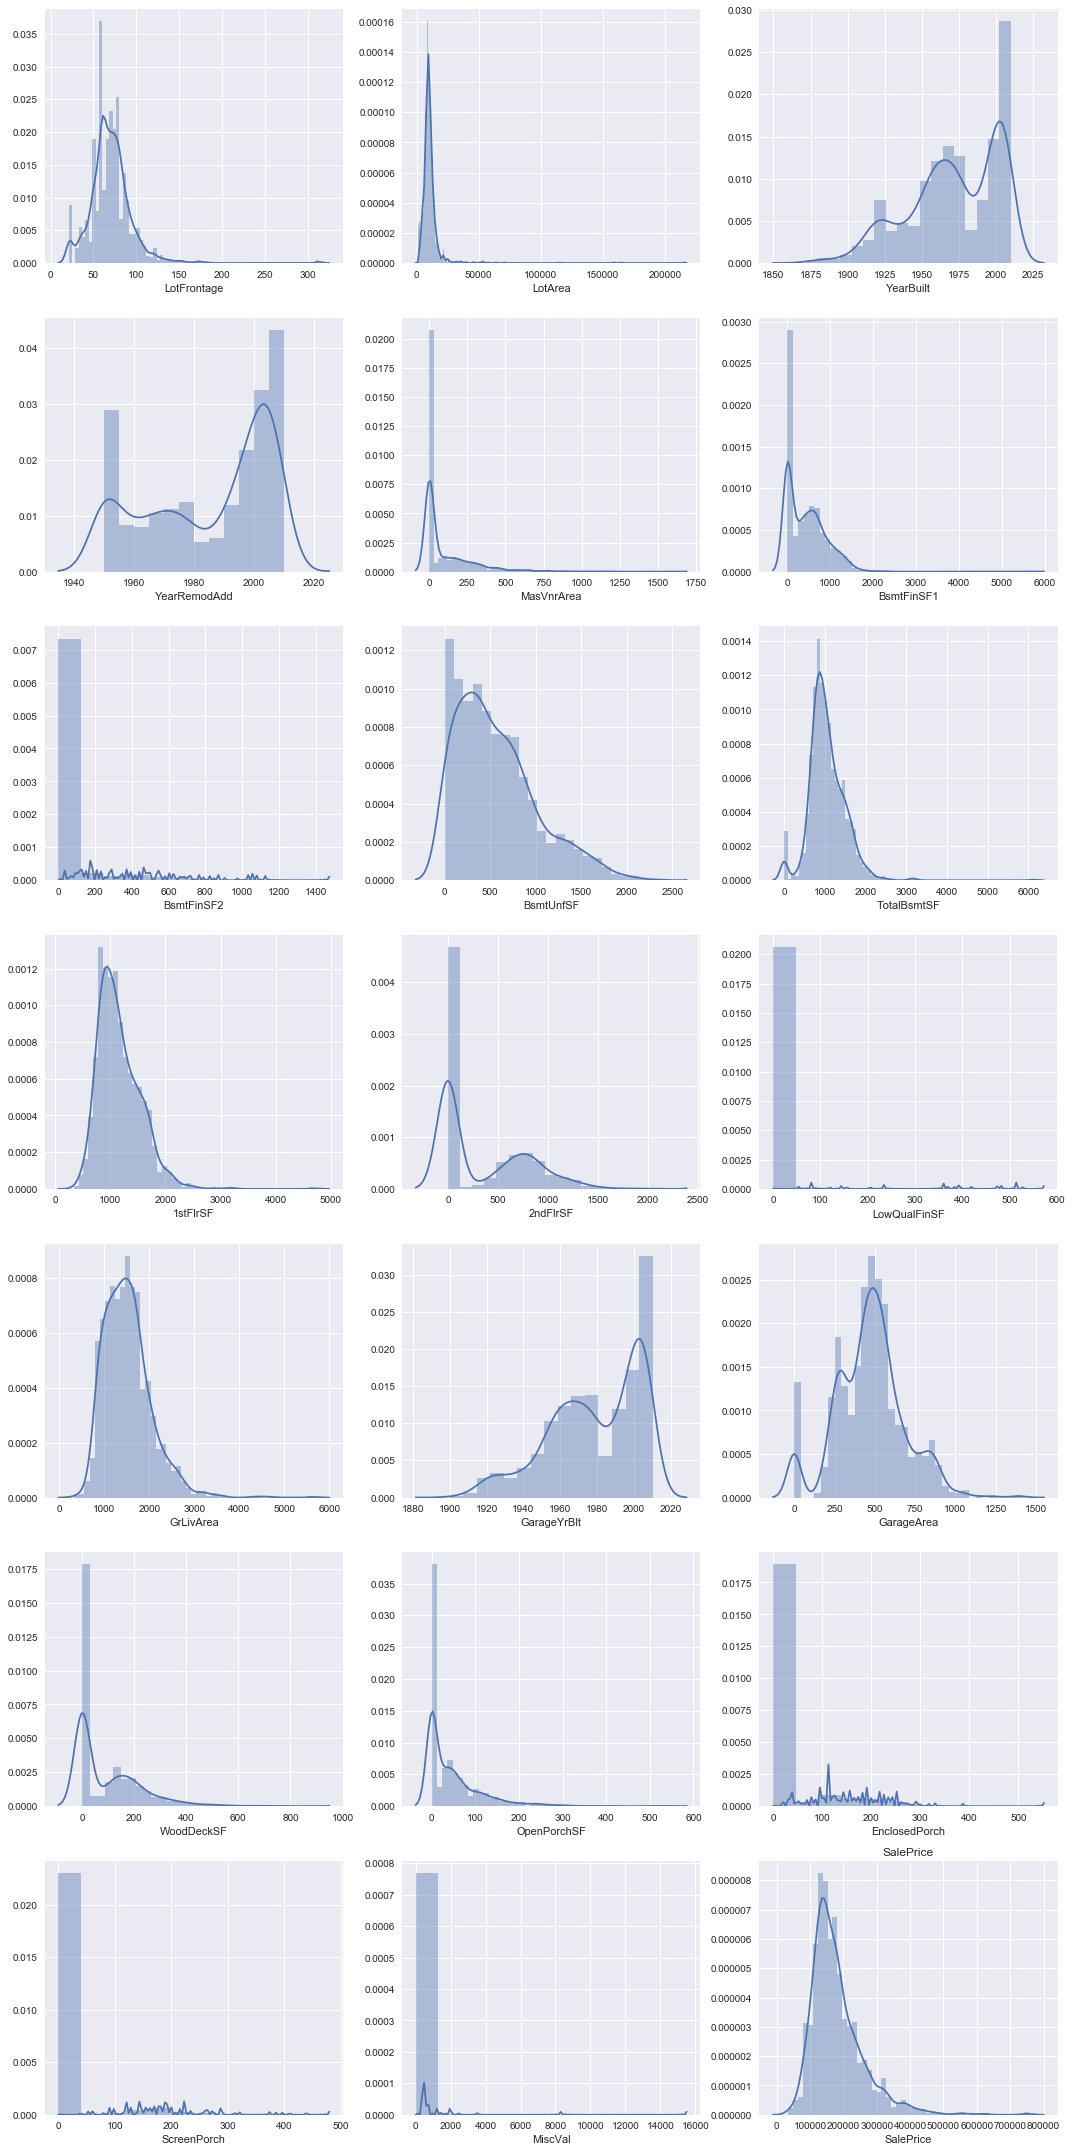

In [27]:
cat_data = ames.loc[:,(ames.dtypes != 'object') & (ames.nunique() > 20)]

fig, axes = plt.subplots(nrows=cat_data.shape[1]//3, ncols=3, figsize=(15,30))
categoricals = [category for category in cat_data.columns if category!='Id']

for ax, category in zip(axes.flatten(), categoricals):
    sns.distplot(cat_data[category].dropna(), ax=ax, bins='auto')
    plt.title(category)
    plt.show()
    
fig.tight_layout()

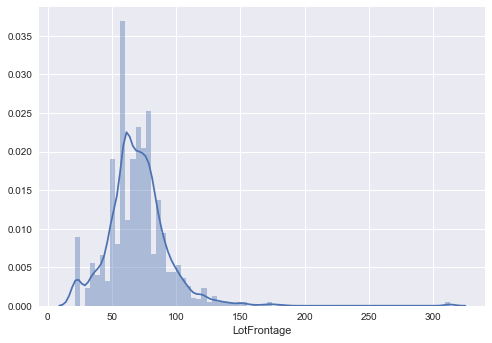

Is this distribution continuous? y


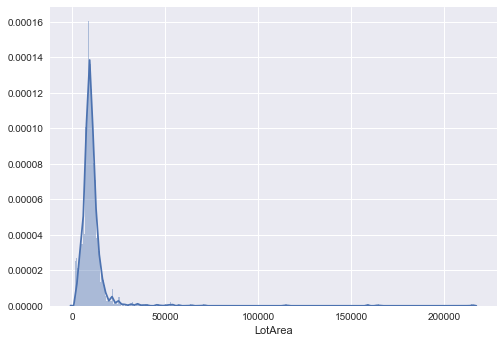

Is this distribution continuous? y


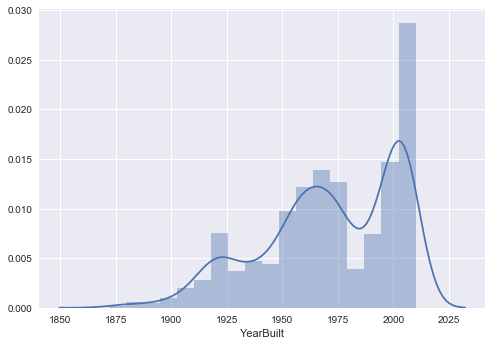

Is this distribution continuous? n


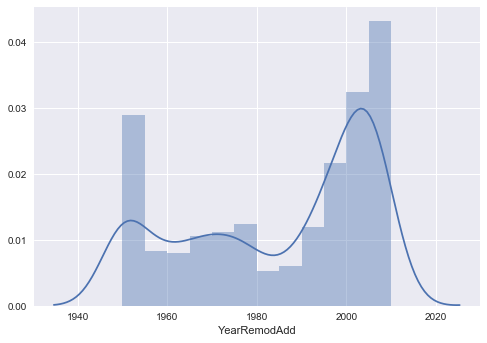

Is this distribution continuous? n


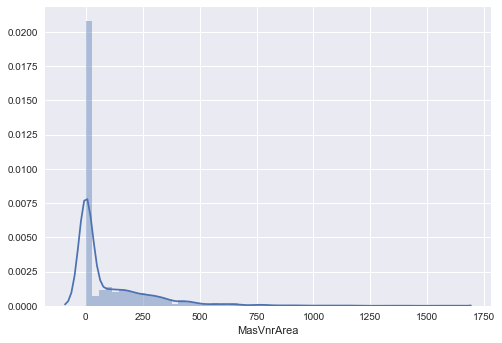

Is this distribution continuous? y


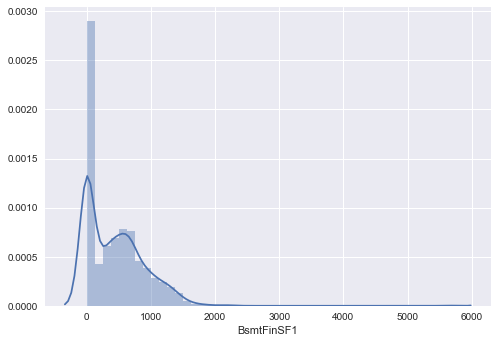

Is this distribution continuous? y


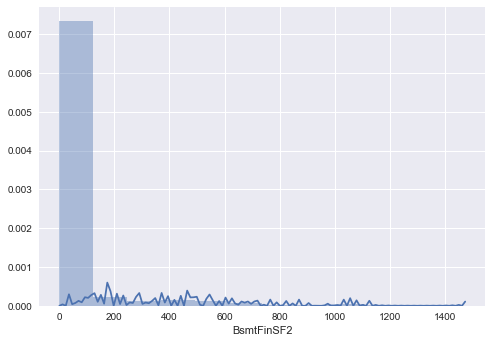

Is this distribution continuous? y


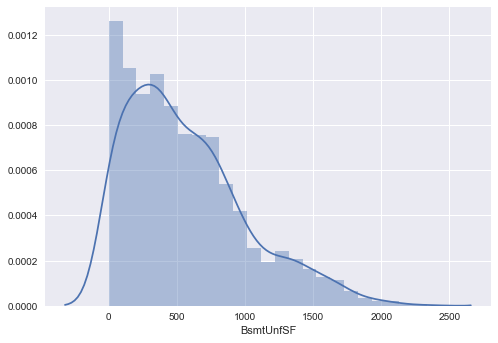

Is this distribution continuous? y


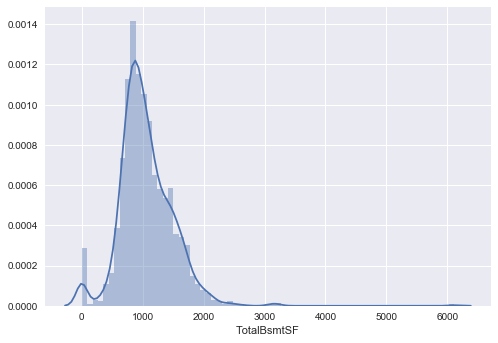

Is this distribution continuous? y


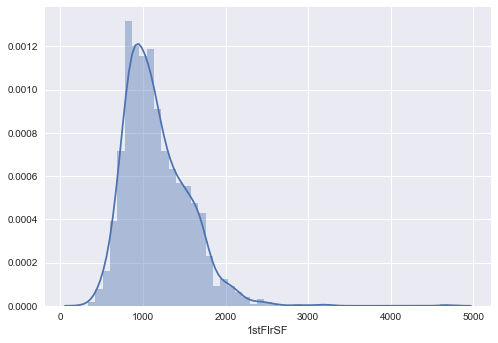

Is this distribution continuous? y


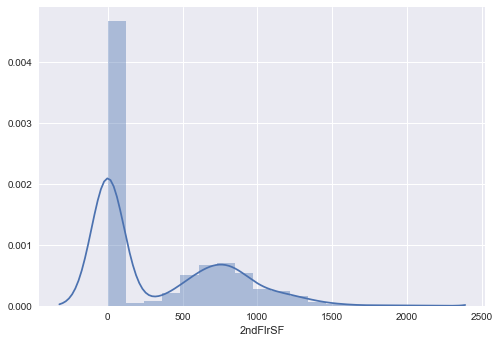

Is this distribution continuous? y


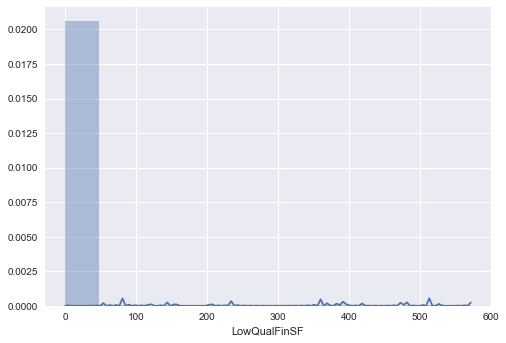

Is this distribution continuous? n


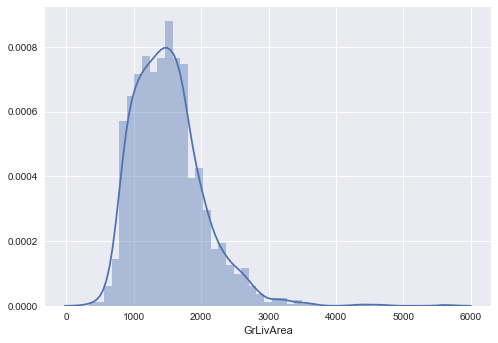

Is this distribution continuous? y


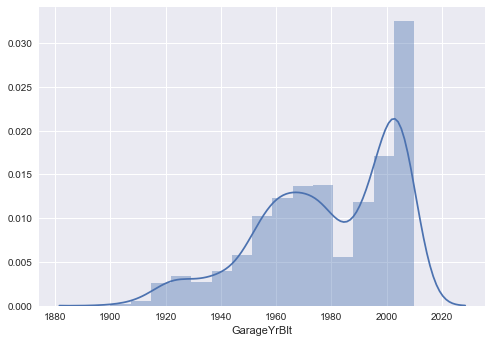

Is this distribution continuous? n


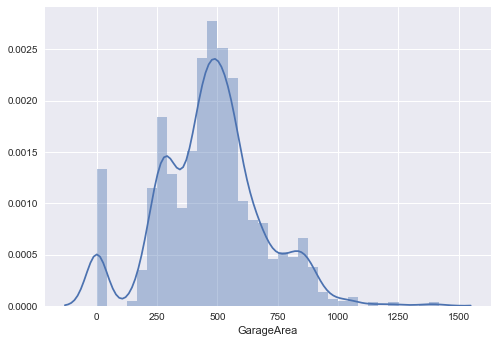

Is this distribution continuous? y


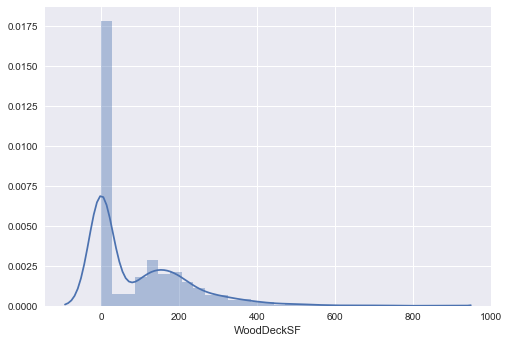

Is this distribution continuous? n


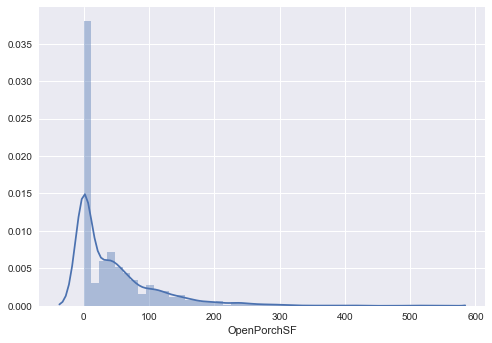

Is this distribution continuous? n


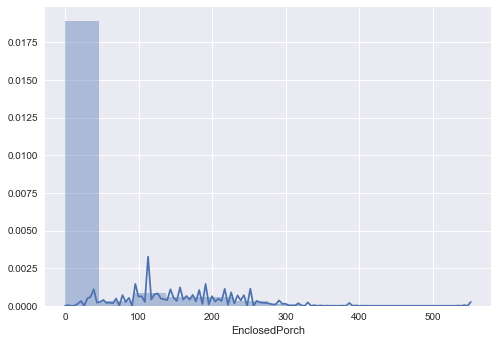

Is this distribution continuous? n


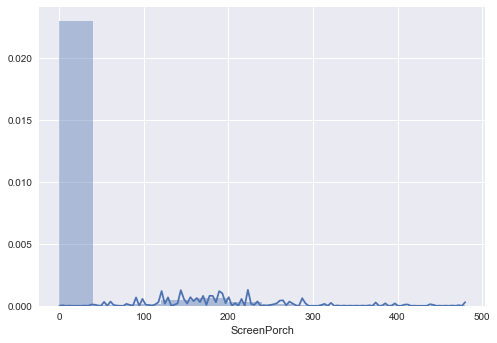

Is this distribution continuous? n


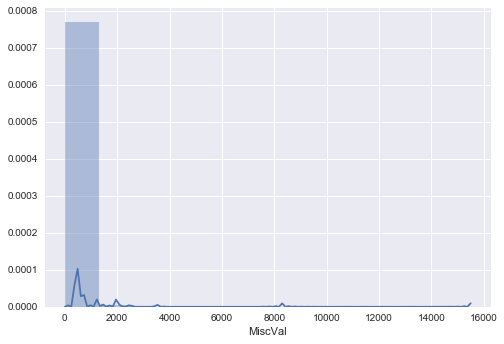

Is this distribution continuous? n


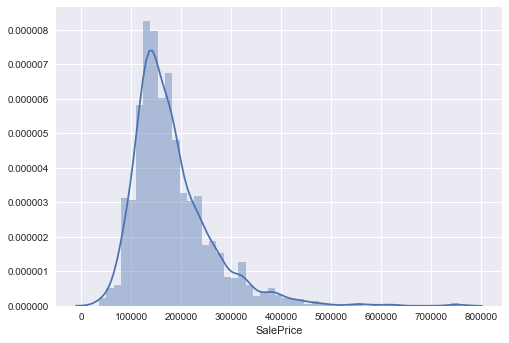

Is this distribution continuous? y


In [30]:
num_cols = []
for col in categoricals:
    sns.distplot(cat_data[col].dropna(), bins='auto')
    plt.show()
    resp = input('Is this distribution continuous? ')
    if resp.lower() == "y" or resp.lower() == "yes":
        num_cols.append(col)
    

In [56]:
num_cols.append('GrLivArea')
num_cols
# ['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'SalePrice']

['LotFrontage', 'LotArea', '1stFlrSF', 'SalePrice', 'YearBuilt', 'GrLivArea']

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

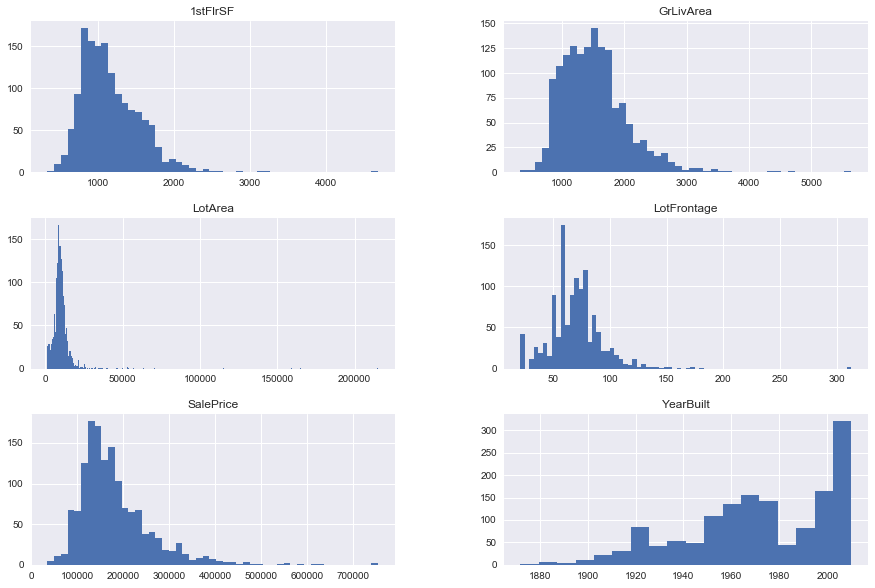

In [57]:
# Select non zero-inflated continuous features as ames_cont
ames_cont = ames[num_cols]
ames_cont.hist(figsize=(15,10), bins='auto');

## Perform log transformations for the variables where it makes sense

In [58]:
# Your code here
import numpy as np

In [59]:
log_names = [f'{name}_log' for name in num_cols]

In [61]:
ames_log = np.log(ames_cont)
ames_log.columns = log_names
ames_log

,LotFrontage_log,LotArea_log,1stFlrSF_log,SalePrice_log,YearBuilt_log,GrLivArea_log
0,4.174387,9.041922,6.752270,12.247694,7.602401,7.444249
1,4.382027,9.169518,7.140453,12.109011,7.588830,7.140453
2,4.219508,9.328123,6.824374,12.317167,7.601402,7.487734
3,4.094345,9.164296,6.867974,11.849398,7.557473,7.448334
4,4.430817,9.565214,7.043160,12.429216,7.600902,7.695303
...,...,...,...,...,...,...
1455,4.127134,8.976768,6.859615,12.072541,7.600402,7.406711
1456,4.442651,9.486076,7.636752,12.254863,7.589842,7.636752
1457,4.189655,9.109636,7.080026,12.493130,7.570959,7.757906
1458,4.219508,9.181632,6.982863,11.864462,7.575585,6.982863


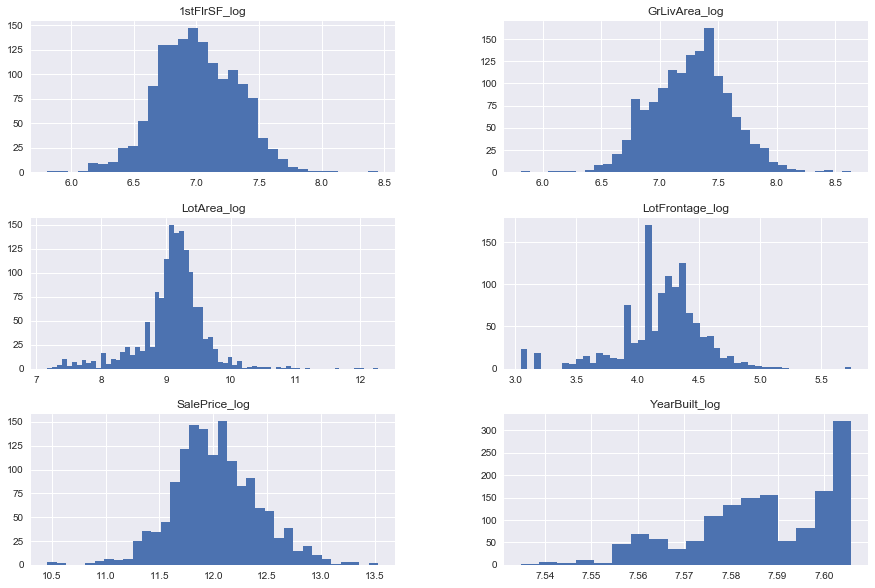

In [67]:
ames_log.hist(figsize=(15,10), bins='auto');


## Standardize the continuous variables

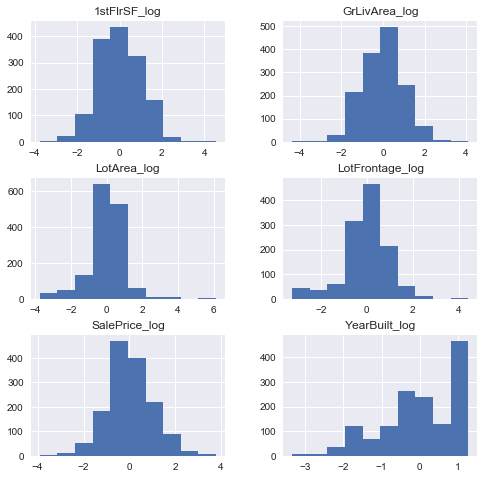

In [68]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = ames_log.apply(normalize)

features_final.hist(figsize  = [8, 8]);

Store your final features in a DataFrame `features_final`: 

In [ ]:
# Your code here

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!